# Capstone Project 1
## House price prediction
data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [312]:
data_directory = 'data/Zip_time_series.csv'
df = pd.read_csv(data_directory, parse_dates=True, index_col='Date')
df.shape

(4383885, 75)

## 1. Data wrangling
This section aims to check data quality, and offers a first pass to correct data that are apparently wrong.The focus for this project is to make house price prediction for the western houston area. Therefore, only certain zip codes are selected.The zip codes selected for the project are: 
+ Saterlite cities:
++ Katy: [77493, 77494]
++ Sugarland: [77478, 77479, 77487, 77496, 77498]
++ Pearland: [77047, 77089, 77581, 77584, 77588]
+ Houston:
++ West University: [77005]
++ Rice Military: [77007]
++ Memorial: [77024]
++ Medical: [77025, 77054, 77030, 77004]
++ Heights: [77007, 77008, 77009]




### 1.1 Data importance check
+ when a column has too many null value, this column should be deleted.
+ for any categorical data, if the total number of one category significantly outweight the other categories combined, it is not a good indication of sale price and therefore is deleted.

In [313]:
# only certain zip codes are included in the analysis
katy = [77493, 77494]
sugarland = [77478, 77479, 77498]
pearland = [77047, 77089, 77581, 77584]
west_univ = [77005]
rice_mil = [77007]
memorial = [77024]
medical = [77025, 77054, 77030, 77004]
heights = [77007, 77008, 77009]
zip_codes = {'katy':katy,
             'sugarland':sugarland,
            'pearland':pearland,
            'west_univ':west_univ,
            'rice_military':rice_mil,
            'memorial':memorial,
            'medical':medical,
            'heights':heights}

# extract data from df to df_houston
df_houston = []
ct = 0
for key, zip_code in zip_codes.items():
    for z in zip_code:
        df_temp = df[df['RegionName']==z]
        print('zip code is: '+str(z)+', and the data shape is: '+str(df_temp.shape))
        df_temp['Region'] = key # add a region column to store the region names
        df_houston.append(df_temp)
        ct += 1
df_houston = pd.concat(df_houston, join='outer', axis = 0)
df_houston.rename(columns={'RegionName':'zip_code'}, inplace=True)
print('df_houston shape is: '+str(df_houston.shape))

zip code is: 77493, and the data shape is: (96, 75)
zip code is: 77494, and the data shape is: (261, 75)
zip code is: 77478, and the data shape is: (96, 75)
zip code is: 77479, and the data shape is: (96, 75)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


zip code is: 77498, and the data shape is: (96, 75)
zip code is: 77047, and the data shape is: (261, 75)
zip code is: 77089, and the data shape is: (96, 75)
zip code is: 77581, and the data shape is: (261, 75)
zip code is: 77584, and the data shape is: (261, 75)
zip code is: 77005, and the data shape is: (261, 75)
zip code is: 77007, and the data shape is: (261, 75)
zip code is: 77024, and the data shape is: (96, 75)
zip code is: 77025, and the data shape is: (261, 75)
zip code is: 77054, and the data shape is: (261, 75)
zip code is: 77030, and the data shape is: (251, 75)
zip code is: 77004, and the data shape is: (261, 75)
zip code is: 77007, and the data shape is: (261, 75)
zip code is: 77008, and the data shape is: (261, 75)
zip code is: 77009, and the data shape is: (261, 75)
df_houston shape is: (3959, 76)


In [310]:
# check the number of none-nan values in df_houston
df_houston.count()

zip_code                                                         3959
InventorySeasonallyAdjusted_AllHomes                             1728
InventoryRaw_AllHomes                                            1728
MedianListingPricePerSqft_1Bedroom                                 16
MedianListingPricePerSqft_2Bedroom                                381
MedianListingPricePerSqft_3Bedroom                               1138
MedianListingPricePerSqft_4Bedroom                               1063
MedianListingPricePerSqft_5BedroomOrMore                          318
MedianListingPricePerSqft_AllHomes                               1580
MedianListingPricePerSqft_CondoCoop                               260
MedianListingPricePerSqft_DuplexTriplex                             0
MedianListingPricePerSqft_SingleFamilyResidence                  1562
MedianListingPrice_1Bedroom                                        12
MedianListingPrice_2Bedroom                                       421
MedianListingPrice_3

In [331]:
# averge values categorized by region and date
def nan_avg(series):
    if np.all(np.isnan(series)) == True:
        return np.nan
    else:
        return np.nanmean(series)
        
df_temp = df_houston.groupby(['Region','Date']).apply(np.nan_avg)
type(df_temp)

pandas.core.series.Series

In [329]:
df_temp['ZHVIPerSqft_AllHomes'].count()

0

In [324]:
df_temp = df_temp.unstack(level=0)
df_temp.tail(20)

zip_code                                                      \
Region      heights     katy   medical memorial  pearland rice_military   
Date                                                                      
2016-05-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2016-06-30  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2016-07-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2016-08-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2016-09-30  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2016-10-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2016-11-30  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2016-12-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-01-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-02-28  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-03-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-04-30  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-05-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-06-30  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-07-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-08-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-09-30  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-10-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-11-30  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   
2017-12-31  77008.0  77493.5  77028.25  77024.0  77325.25       77007.0   

                               InventorySeasonallyAdjusted_AllHomes         \
Region     sugarland west_univ                              heights   katy   
Date                                                                         
2016-05-31   77485.0   77005.0                           428.333333  540.5   
2016-06-30   77485.0   77005.0                           429.666667  541.5   
2016-07-31   77485.0   77005.0                           425.333333  556.0   
2016-08-31   77485.0   77005.0                           411.666667  561.5   
2016-09-30   77485.0   77005.0                           398.000000  548.0   
2016-10-31   77485.0   77005.0                           391.666667  531.0   
2016-11-30   77485.0   77005.0                           386.333333  516.5   
2016-12-31   77485.0   77005.0                           380.333333  503.5   
2017-01-31   77485.0   77005.0                           373.666667  494.5   
2017-02-28   77485.0   77005.0                           361.666667  485.5   
2017-03-31   77485.0   77005.0                           360.333333  488.5   
2017-04-30   77485.0   77005.0                           372.666667  505.5   
2017-05-31   77485.0   77005.0                           379.666667  516.0   
2017-06-30   77485.0   77005.0                           381.666667  527.5   
2017-07-31   77485.0   77005.0                           385.333333  545.0   
2017-08-31   77485.0   77005.0                           386.333333  543.5   
2017-09-30   77485.0   77005.0                           380.333333  530.0   
2017-10-31   77485.0   77005.0                           372.000000  526.0   
2017-11-30   77485.0   77005.0                           365.333333  529.5   
2017-12-31   77485.0   77005.0                           362.000000  534.5   

              ...    Zri_MultiFamilyResidenceRental            \
Region        ...                         sugarland west_univ   
Date          ...                                               
2016-05-31    ...                            1647.5    1654.0   
2016-06-30    ...                            1643.5    1644.0   
2016-07-31    ...                            1637.0    1644.0   
2016-08-31    ...                            1627.0    1636.0   
2016-09-30    ...                  

In [325]:
df_temp.shape

(261, 600)

Region
heights          0
katy             0
medical          0
memorial         0
pearland         0
rice_military    0
sugarland        0
west_univ        0
dtype: int64


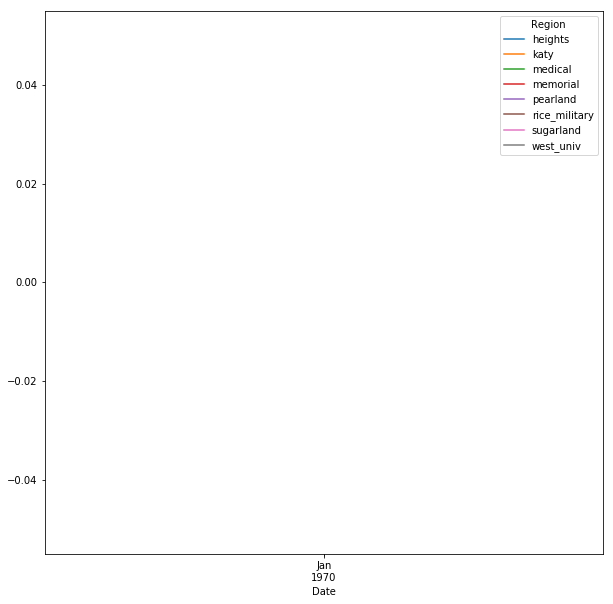

In [326]:
print(df_temp['ZHVIPerSqft_AllHomes'].count())
df_temp['ZHVIPerSqft_AllHomes'].plot(figsize=(10,10))


In [243]:
df_temp = df_houston.groupby(['Region','Date'])[['MedianListingPricePerSqft_AllHomes','MedianListingPricePerSqft_1Bedroom']].apply(np.mean)
type(df_temp)

pandas.core.frame.DataFrame

In [241]:
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df_test = pd.DataFrame(ipl_data)
df_test
df_test = df_test.groupby('Team')[['Year','Points']].mean()
df_test
type(df_test)

pandas.core.frame.DataFrame

In [271]:
a = np.array([[1, np.nan], [3, 4]])
a[0].nanmean()


AttributeError: 'numpy.ndarray' object has no attribute 'nanmean'